In [ ]:
# ..... find markers for each cluster? ..... #

In [2]:
library(Seurat)
library(dplyr)

In [3]:
# gene lists
m1 = read.delim('~/septation/markers/Bayraktar_marker_genes.txt', sep = '\t')
m1[1:2,]

ctypes = m1$Cluster
top_markers = c()

for(ii in 1:length(ctypes)){
    temp = data.frame(compartment = m1$Compartment[ii], 
                      subtype = m1$Subtype[ii], cluster = m1$Cluster[ii],
                      gene = unique(unlist(stringr::str_split(m1$Gene[ii], ','))))
    top_markers = rbind(top_markers, temp)
}
top_markers[1:3,]

Compartment    Subtype              Cluster                  
1 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft 
2 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesRight
  Gene                                                                                                
1 TNNT2,ACTN2,LDB3,CSRP3,SMPX,KCNMB2,PCDH7,RYR3,PANCR,MBP,NAV3,PITX2,NPTN,NPPA,MYL7,MYL4,MYH6,PPKAG2  
2 TNNT2,ACTN2,LDB3,CSRP3,SMPX,NTM,ROR1,KIF26B,PLC1,ANGPT1,BRINP3,BMP10,NPTN,NPPA,MYL7,MYL4,MYH6,PPKAG2
  Comments                                                
1 Genes NPPA,MYL7,MYL4,MYH6,PPKAG2 are from Kanemaru et al
2 Genes NPPA,MYL7,MYL4,MYH6,PPKAG2 are from Kanemaru et al

compartment    subtype              cluster                  gene 
1 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft TNNT2
2 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft ACTN2
3 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft LDB3

In [4]:
papers = c('Asp', 'Feng', 'Hill', 'Knight-Schrijver', 'Mantri', 'Qiu', 
           'Farah', 'Kanemaru', 'Xu', 'Cui')

cols1 = c('predicted', 'predicted', 'predicted', 'class', 'predicted', 'class',
          'predicted', 'class', 'predicted', 'predicted')

In [5]:
# get list of samples
stages = c(rep('stage23', 2), rep(c('stage28', 'stage32'), each = 3))
samples = c('sample3', 'sample10', 'sample5', 'sample10', 'sample11',
           'sample5', 'sample10', 'sample12')

In [98]:
# load data
id = 6
file0 = paste0(stages[id], '_', samples[id], '_data.rds')
paste0(stages[id], '_', samples[id])

sce = readRDS(file0)
sce

[1] "stage32_sample5"

An object of class Seurat 
17007 features across 4986 samples within 1 assay 
Active assay: RNA (17007 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [99]:
files0 = list.files('annotations/')
files1 = files0[grep(paste0(stages[id], '_', samples[id]), files0)]
files1

[1] "stage32_sample5_Asp_celltypes.csv"             
 [2] "stage32_sample5_Cui_celltypes.csv"             
 [3] "stage32_sample5_Farah_celltypes.csv"           
 [4] "stage32_sample5_Feng_celltypes.csv"            
 [5] "stage32_sample5_Hill_celltypes.csv"            
 [6] "stage32_sample5_Kanemaru_celltypes.csv"        
 [7] "stage32_sample5_Knight-Schrijver_celltypes.csv"
 [8] "stage32_sample5_Mantri_celltypes.csv"          
 [9] "stage32_sample5_Qiu_celltypes.csv"             
[10] "stage32_sample5_Xu_celltypes.csv"

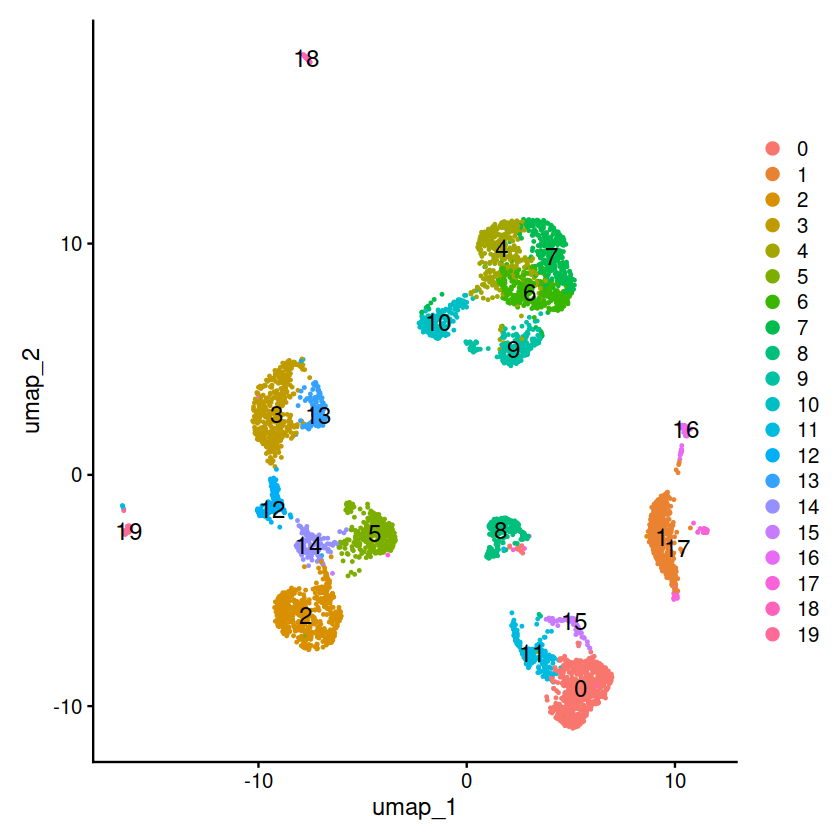

In [100]:
DimPlot(sce, reduction = 'umap', label = T, label.size = 5)
Idents(sce) <- "seurat_clusters"

In [111]:
# top markers
markers <- FindMarkers(object = sce, ident.1 = 19, only.pos = T)
head(markers)
rownames(markers)[1:50]

p_val         avg_log2FC pct.1 pct.2 p_val_adj    
CDH19   0.000000e+00  9.933273  0.806 0.002  0.000000e+00
OCA2    0.000000e+00  7.808023  0.677 0.005  0.000000e+00
SOX10   0.000000e+00 12.087167  0.484 0.000  0.000000e+00
TFAP2C  0.000000e+00 13.114317  0.323 0.000  0.000000e+00
NRCAM  1.082480e-304  8.232019  0.742 0.008 1.840973e-300
PHOX2B 5.875458e-302  7.972338  0.355 0.001 9.992391e-298

[1] "CDH19"              "OCA2"               "SOX10"             
 [4] "TFAP2C"             "NRCAM"              "PHOX2B"            
 [7] "FSTL5"              "ENSGALG00010021842" "ENSGALG00010002930"
[10] "EDNRB2"             "TMEM74"             "DLX2"              
[13] "SORCS1"             "PAX3"               "CHST8"             
[16] "CHL1"               "RXRG"               "EGF"               
[19] "CELF4"              "MMP17"              "RORB"              
[22] "TFAP2A"             "ADGRB3"             "AVPR1A"            
[25] "VENTX.1"            "DOCK3"              "COL25A1"           
[28] "MOXD1"              "DPP10"              "AQP4"              
[31] "ENSGALG00010016173" "CDH6"               "CDH7"              
[34] "FSTL3"              "AFAP1L2"            "PTPN13"            
[37] "MAP2"               "PTPRJ"              "ZNF536"            
[40] "KCNG2"              "TRIM71"             "PPP2R2C"           
[43] "NELL1"              "COBL"               "SH2D4A"            
[46] "CRLF2"              "RHCG"               "PLP1"              
[49] "ENSGALG00010007049" "HRH1"

In [112]:
options(warn = -1)

ctypes = unique(top_markers$cluster)
df2 = data.frame(celltype = ctypes, num_markers = NA, avg_rank = NA,
                min_rank = NA, best_gene = NA, genes = NA)

for(ii in 1:length(ctypes)){
    gset = unlist(top_markers$gene[top_markers$cluster==ctypes[ii]])
    vec2 = match(gset, rownames(markers))
    df2$num_markers[ii] = sum(!is.na(vec2))
    df2$avg_rank[ii] = round(mean(vec2, na.rm = T))
    df2$min_rank[ii] = min(vec2, na.rm = T)
    df2$best_gene[ii] = rownames(markers)[df2$min_rank[ii]]
    df2$genes[ii] = paste(rownames(markers)[sort(vec2[!is.na(vec2)])], collapse = ', ')
}

# df2 %>% filter(grepl('Fibroblasts|Pericytes|SmoothMuscleCells|EndothelialCells|Epicardial', celltype)) %>% arrange(-(num_markers)) %>% head(., 15)
df2 %>% arrange(-(num_markers)) %>% head(., 15)

celltype                                   num_markers avg_rank min_rank
1  SchwannCellPrecursors                      16           522       1     
2  SchwannCells                               16           738       1     
3  ParasympatheticNeurons                     11          1727       6     
4  SinoatrialNodePacemakerCells                7          1098     235     
5  AtrioventricularNodePackemakerCells         7          1019      39     
6  SympatheticNeurons                          7          2299       6     
7  CoronarySmoothMuscleCells                   6          1082      52     
8  EpicardiumDerivedCells                      6          2612     351     
9  VentricularCardiomyocytesRightTrabeculated  5           435     123     
10 AtrialCardiomyocytesRight                   4           851     108     
11 VentricularCardiomyocytesLeftTrabeculated   4           764     124     
12 Myofibroblasts                              4           754      95     
13 ValveInterstitialCells                      4          1076     229     
14 PericardialCellsIntermediate                4          1112     232     
15 CoronaryArterialEndothelialCells            4          1630     286     
   best_gene
1  CDH19    
2  CDH19    
3  PHOX2B   
4  TENM4    
5  ZNF536   
6  PHOX2B   
7  EDNRB    
8  VEGFC    
9  ENOX1    
10 NTM      
11 OPCML    
12 ITGA1    
13 COL9A3   
14 AUTS2    
15 COL4A1   
   genes                                                                                                                  
1  CDH19, PHOX2B, CDH6, ZNF536, IL1RAPL2, SOX5, MEF2C, LAMA4, SLC35F1, GFRA1, ERBB3, IL1RAP, PLS3, PTPRZ1, SLITRK6, NRXN1 
2  CDH19, CDH6, ZNF536, SOX5, MEF2C, LAMA4, SLC35F1, ERBB3, COL4A1, ARHGAP15, LAMB1, OLFML2A, NR2F2, PTPRZ1, NRXN1, TGFBR3
3  PHOX2B, CELF4, CDH6, STMN2, SV2C, SYT1, NRXN1, GATA3, CD24, EML5, RTN1                                                 
4  TENM4, NPTN, TBX3, NR2F2, CACNA1D, MYH11, NRXN1                                                                        
5  ZNF536, NPTN, TBX3, NR2F2, CACNA1D, GNG11, NRXN1                                                                       
6  PHOX2B, STMN2, SYT1, GATA3, CD24, EML5, RTN1                                                                           
7  EDNRB, TBX2, COL18A1, NR2F2, ENPEP, AGRN                                                                               
8  VEGFC, EZR, CPB1, KRT18, MYRF, CFI                                                                                     
9  ENOX1, NCALD, KCNIP4, ADAMTSL1, SPOCK1                                                                                 
10 NTM, NPTN, BRINP3, ROR1                                                                                                
11 OPCML, ADAMTSL1, SPOCK1, BRINP3                                                                                        
12 ITGA1, TNC, MCAM, FBN1                                                                                                 
13 COL9A3, COL9A1, ID4, COL9A2                                                                                            
14 AUTS2, CD9, CD81, COL16A1                                                                                              
15 COL4A1, COL4A2, FBN1, AGRN

In [105]:
# NPPA, MYL4 in atria, BMP10, IRX4 in ventricles, ACTC1 and GJA5 in both - Mantri et al
paste0('BMP10   ', which(rownames(markers)=='BMP10'))
paste0('IRX4   ', which(rownames(markers)=='IRX4'))
paste0('TBX5   ', which(rownames(markers)=='TBX5'))
paste0('MYL4   ', which(rownames(markers)=='MYL4'))
paste0('MYOZ2   ', which(rownames(markers)=='MYOZ2'))

[1] "BMP10   "

[1] "IRX4   "

[1] "TBX5   "

[1] "MYL4   "

[1] "MYOZ2   "

In [106]:
# CDH5 for endo, DCN, COL6A3 for mesenchymal, TCF21 in fibro, ACTA2 for mural, BNC1 for epicardial
paste0('COL6A3   ', which(rownames(markers)=='COL6A3'))
paste0('DCN   ', which(rownames(markers)=='DCN'))
paste0('TCF21   ', which(rownames(markers)=='TCF21'))
paste0('ACTA2   ', which(rownames(markers)=='ACTA2'))
paste0('CDH5   ', which(rownames(markers)=='CDH5'))
paste0('BNC1   ', which(rownames(markers)=='BNC1'))

[1] "COL6A3   305"

[1] "DCN   121"

[1] "TCF21   "

[1] "ACTA2   3243"

[1] "CDH5   "

[1] "BNC1   2257"

In [107]:
match(c('PTPRC', 'RUNX1'), rownames(markers))  # all

match(c('CD163', 'CD14', 'C1QA', 'FCN1', 'TIMD4', 'CX3CR1', 'LYVE1', 'C3', 'IL18',
       'CLNK', 'LAMP3', 'ENOX1', 'RUNX2', 'CUX2', 'CPA3'), rownames(markers))  # myeloid
match(c('ITGA2B', 'GATA1'), rownames(markers))  # megakaryocyte
match(c('CD3E', 'IL7R', 'CD40LG', 'BCL11B', 'CD6', 'CD8A', 'CD8B', 'THEMS',
       'MME', 'VPREB1', 'PCDH9', 'MS4A1', 'KLRK1', 'TOX2', 'RORC'), rownames(markers))  # lymhpoid
match(c('KIT', 'CPA3'), rownames(markers))  # mast

[1] NA NA

[1]   NA   NA   NA   NA   NA   NA  313   NA   NA   NA 3198   NA  316   NA   NA

[1] NA NA

[1] NA NA NA NA NA NA NA NA NA NA  4 NA NA NA NA

[1] NA NA

In [113]:
# neural crest cells --- shows up with fibroblasts (due to BNC1, BNC2)
match(c('PHOX2B', 'SOX10', 'HCN4', 'TBX3', 'TBX18', 'TH', 'TFAP2A',
       'PAX3', 'PAX7', 'BMP4', 'BMP7', 'SEMA3C', 'NPN1', 'FOXD3',
       'SNAI1', 'SOX9', 'NRXN1', 'TFAP2B'), rownames(markers))  # all

match(c('PHOX2A', 'PCSK1N', 'SYT1', 'ASLC1', 'BNC2'), rownames(markers))  # neurons + precursors
match(c('GATA3', 'ISL1', 'RTN1', 'DBH', 'VSTM2L', 'SV2C', 'SLC5A7'), rownames(markers))  # sym + para neurons
match(c('DLK1', 'EPAS1', 'KCNJ6'), rownames(markers))  # chromaffin

match(c('PTPRZ1', 'CDH19', 'ERBB3', 'SLITRK6', 'IL1RAPL2', 'COL20A1',
      'LAMB1', 'COL14A1', 'TGFBR3'), rownames(markers))  # glia

[1]    6    3   NA  356   NA   NA   22   14   NA   NA   NA   NA   NA   NA   NA
[16]  247 2576   NA

[1]  NA  NA 464  NA  NA

[1] 2735   NA 4581   NA   NA  282   NA

[1] NA NA NA

[1] 1556    1  258 2286   60   NA  962   NA 3057

In [52]:
# get df of classifications and annos
df = c()

for(ii in 1:length(papers)){
    temp = read.delim(paste0('annotations/', stages[id], '_', samples[id], '_', papers[ii], '_celltypes.csv'), sep = ',')
    temp$study = papers[ii]
    temp$cluster = sce$seurat_clusters
    temp$anno = temp[,match(cols1[ii], colnames(temp))]
    df = rbind(df, temp[,c('study', 'cluster', 'anno')])
}

df$ctype = paste0(df$study, '_', df$anno)
head(df)

study cluster anno                 
stage23_sample10_AAACCCAAGAAGCCTG-1 Asp   6       aCM                  
stage23_sample10_AAACCCAAGAATTCAG-1 Asp   3       aCM                  
stage23_sample10_AAACCCAAGCATGTTC-1 Asp   3       vCM                  
stage23_sample10_AAACCCAAGCGCCATC-1 Asp   1       Capillary endothelium
stage23_sample10_AAACCCAAGCGTACAG-1 Asp   8       vCM                  
stage23_sample10_AAACCCAAGTTGGAAT-1 Asp   2       aCM                  
                                    ctype                    
stage23_sample10_AAACCCAAGAAGCCTG-1 Asp_aCM                  
stage23_sample10_AAACCCAAGAATTCAG-1 Asp_aCM                  
stage23_sample10_AAACCCAAGCATGTTC-1 Asp_vCM                  
stage23_sample10_AAACCCAAGCGCCATC-1 Asp_Capillary endothelium
stage23_sample10_AAACCCAAGCGTACAG-1 Asp_vCM                  
stage23_sample10_AAACCCAAGTTGGAAT-1 Asp_aCM

In [53]:
table(sce$seurat_clusters)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1633 1013  710  662  586  543  446  425  418  368  317  225  206  204  171  123 
  16   17   18   19 
 108   59   47   23 

In [54]:
df %>% filter(cluster == 17) %>%
group_by(ctype) %>% reframe(count = n()) %>% arrange(-count) 

ctype                                        count
1  Cui_C2 (CM)                                  51   
2  Knight-Schrijver_Endothelial_Other           48   
3  Feng_ventricular_cm                          45   
4  Kanemaru_lymphocyte                          42   
5  Qiu_Megakaryocytes                           38   
6  Farah_vCM                                    35   
7  Asp_vCM                                      33   
8  Hill_CM                                      31   
9  Mantri_Cardiomyocytes-2                      28   
10 Xu_cardiomyocyte-1                           26   
11 Farah_ncCM                                   16   
12 Mantri_Dendritic cells                       16   
13 Qiu_Definitive_erythroid                     15   
14 Xu_epithelium-1                              15   
15 Mantri_Fibroblast cells                      14   
16 Asp_aCM                                      13   
17 Hill_CM-LSV                                  11   
18 Asp_Myoz2 CM                                  9   
19 Kanemaru_mast cell                            9   
20 Knight-Schrijver_Immature_Cardiomyocytes      8   
21 Xu_epithelium-3                               8   
22 Hill_CM-Atrial                                7   
23 Feng_atrial_cm                                6   
24 Farah_P-RBC                                   4   
25 Hill_Gata1                                    4   
26 Kanemaru_regular ventricular cardiac myocyte  4   
27 Cui_C9 (B/T cells)                            3   
28 Feng_blood                                    3   
29 Hill_CM-RA                                    3   
30 Kanemaru_endothelial cell                     3   
31 Qiu_Primitive_erythroid                       3   
32 Asp_Endothelium Pericytes Adventia            2   
33 Asp_unassigned                                2   
34 Cui_C1 (5W)                                   2   
35 Cui_C4 (EC)                                   2   
36 Farah_aCM                                     2   
37 Feng_endocardial_ec                           2   
38 Feng_fibroblast-like                          2   
39 Knight-Schrijver_Immature_other               2   
40 Qiu_Cardiomyocytes                            2   
41 Xu_atrioventricular canal                     2   
42 Xu_cardiomyocyte like                         2   
43 Xu_epithelium-2                               2   
44 Xu_fibroblast-10                              2   
45 Cui_C8 (Macrophage)                           1   
46 Farah_Endocardial                             1   
47 Farah_SMC                                     1   
48 Feng_immune                                   1   
49 Hill_CM-LV                                    1   
50 Hill_CP1                                      1   
51 Hill_EPiC                                     1   
52 Kanemaru_myeloid cell                         1   
53 Knight-Schrijver_Cardiomyocytes               1   
54 Mantri_Erythrocytes                           1   
55 Qiu_Muscle_cells                              1   
56 Xu_Schwann progenitor like                    1   
57 Xu_fibroblast-1                               1

In [41]:
ids = which(sce$seurat_clusters==1)
table(temp$predicted[ids])


          Cardiomyocytes-2          Endocardial cells 
                        85                        732 
      Epi-epithelial cells      Epi-mesenchymal cells 
                         2                          1 
          Fibroblast cells                Mural cells 
                       203                        135 
               Valve cells Vascular endothelial cells 
                         2                         26 